In [2]:
username = "Alex"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
include(pathtorepo * "dynamical-systems\\system.jl")
include(pathtorepo * "dynamical-systems\\visual_regimes.jl");

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`

In [3]:
using StaticArrays, DifferentialEquations, DynamicalSystems
E, x, y  = -40..40, -5..5,  -5..5
box = E × x × y
using CairoMakie, GLMakie
using LinearAlgebra

In [4]:
const τ = 0.013;  const τD = 0.07993;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58; const ΔU0 = 0.305; 

In [5]:
time = 1000; tt = 1000; tstep = 0.001; times = [time, tt]
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [5]:
#I0 = -1.7267; U0 = 0.26737;

#I0 = -1.71225; U0 = 0.26530;

In [6]:
I0 = -1.714; U0 = 0.2657;
p = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]

11-element SVector{11, Float64} with indices SOneTo(11):
  1.58
  0.013
  0.07993
  3.3
  3.07
  0.75
  0.4
  0.2657
  0.305
  0.3
 -1.714

In [7]:
u0_1 = [1.8005184727846382, 0.9264946496424852, 0.5580734424354324]

3-element Vector{Float64}:
 1.8005184727846382
 0.9264946496424852
 0.5580734424354324

In [8]:
ds = CoupledODEs(TM, u0_1, p, diffeq = integ_set)

3-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  TM
 ODE solver:    RK4
 ODE kwargs:    (adaptive = false, dt = 0.001)
 parameters:    [1.58, 0.013, 0.07993, 3.3, 3.07, 0.75, 0.4, 0.2657, 0.305, 0.3, -1.714]
 time:          0.0
 state:         [1.8005184727846382, 0.9264946496424852, 0.5580734424354324]


In [9]:
prob_for = ODEProblem(TM, u0_1, (0.0, 1000), p)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: false
timespan: (0.0, 1000.0)
u0: 3-element Vector{Float64}:
 1.8005184727846382
 0.9264946496424852
 0.5580734424354324

In [10]:
fp, ei, _ = fixedpoints(ds, box, jacob_TM_);

In [11]:
Jac = jacob_TM_(fp[1], p, 0)
eivecs = eigvecs(Jac)
shift = real(eivecs[:, 1])*1e-7 + fp[1];

In [12]:
sol_for = solve(prob_for, alg = Vern9(), adaptive = false, dt = 0.001); 

In [13]:
println("Length: $(length(sol_for))")
println("Last point: $(sol_for[end])")

Length: 1000002
Last point: [8.944548129184021, 0.7489103582893466, 0.4428034450858675]


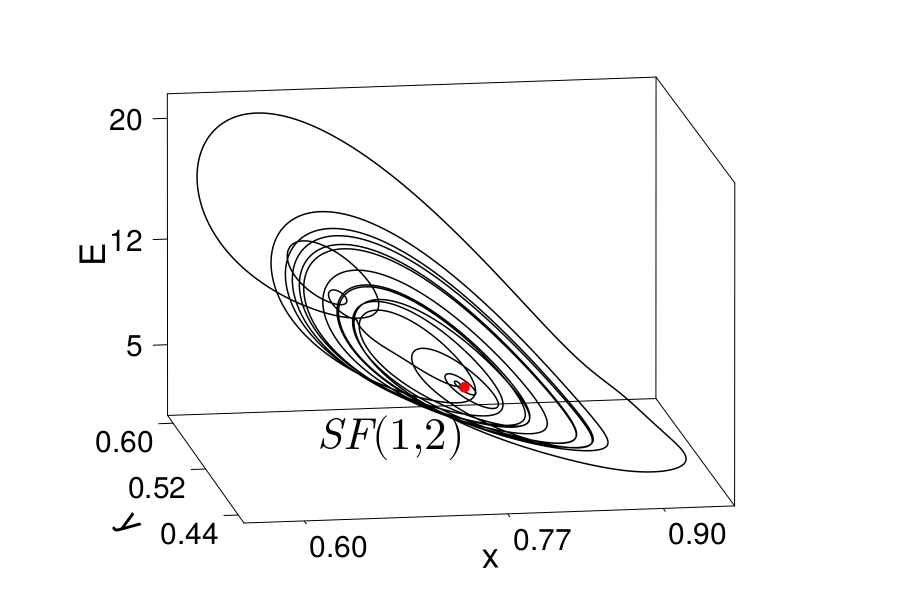

CairoMakie.Screen{IMAGE}


In [14]:
ts, tf = 960000, 994000
idx, idy, idz = 2, 3, 1
lb_size = 35; tck_size = 30;
prot = 60;
disx  = 20;
disy = 70;
disz = 55;

CairoMakie.activate!()
f = Figure(resolution = (900, 600))
ax = Axis3(f[1, 1], azimuth = -0.55pi, elevation = 0.07pi,
            xlabel = "x", ylabel = "y", zlabel = "E",
            xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, zgridvisible = false,
            protrusions = prot, xlabeloffset = disx, ylabeloffset = disy, zlabeloffset = disz,
            xticks = [0.6, 0.77, 0.9], yticks = [0.44, 0.52, 0.60], zticks = [5, 12, 20])

#ax = LScene(f[1, 1])
#scale!(ax.scene, 1, 50, 50)

lines!(sol_for[idx,ts:tf], sol_for[idy,ts:tf], sol_for[idz,ts:tf],
    linewidth = 1.5, color = :black)

for (i, ep) in enumerate(fp)
    scatter!(ep[idx], ep[idy], ep[idz], color = :red, markersize = 15)
    text!(ep[idx], ep[idy], ep[idz],text = L"SF(1,2)", fontsize = 45, color = :black, align = (:right, :top), offset = (0, -25))
end

display(f)

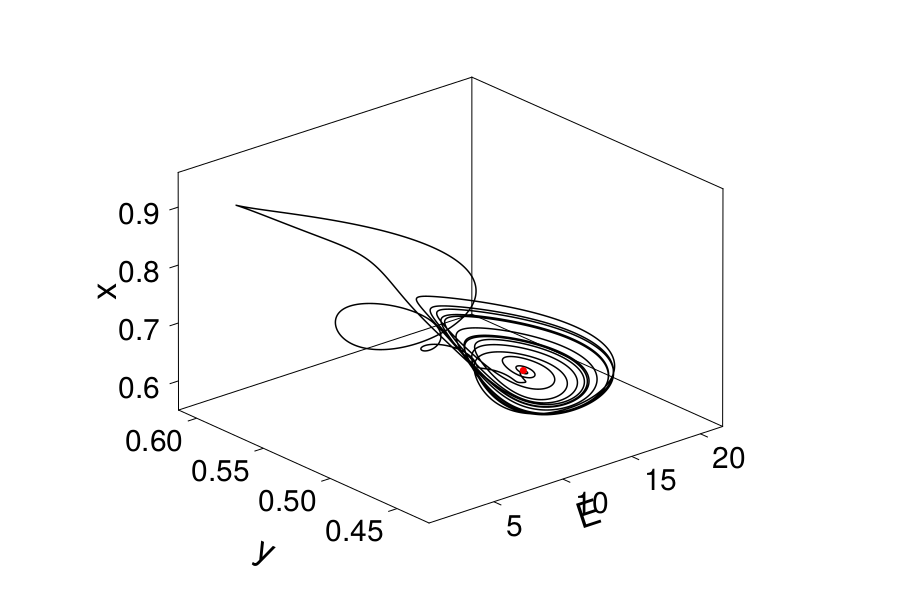

CairoMakie.Screen{IMAGE}


In [15]:
ts, tf = 960000, 994000
idx, idy, idz = 1, 3, 2
lb_size = 35; tck_size = 30;
prot = 60;
disx  = 20;
disy = 70;
disz = 55;

CairoMakie.activate!()
f = Figure(resolution = (900, 600))
ax = Axis3(f[1, 1],
            xlabel = "E", ylabel = "y", zlabel = "x",
            xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, zgridvisible = false,
            protrusions = prot, xlabeloffset = disx, ylabeloffset = disy, zlabeloffset = disz)

#ax = LScene(f[1, 1])
#scale!(ax.scene, 1, 50, 50)

lines!(sol_for[idx,ts:tf], sol_for[idy,ts:tf], sol_for[idz,ts:tf],
    linewidth = 1.5, color = :black)

for (i, ep) in enumerate(fp)
    scatter!(ep[idx], ep[idy], ep[idz], color = :red, markersize = 10)
    #text!(ep[idx], ep[idy], ep[idz],text = L"SF(1,2)", fontsize = 45, color = :black, align = (:right, :top), offset = (0, -25))
end

display(f)

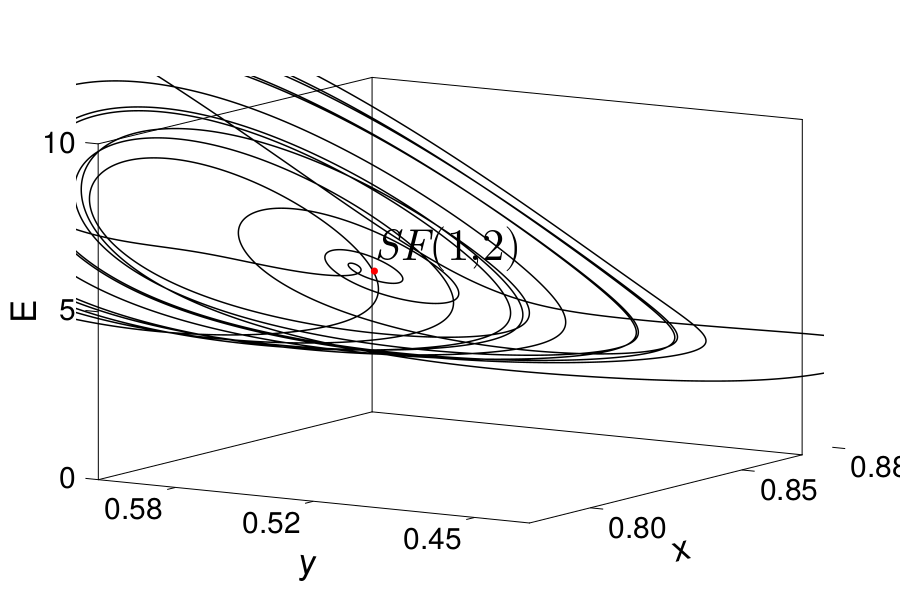

CairoMakie.Screen{IMAGE}


In [16]:
ts, tf = 960000, 994000
idx, idy, idz = 2, 3, 1
lb_size = 35; tck_size = 30;
prot = 60;
disx  = 40;
disy = 40;
disz = 55;

CairoMakie.activate!()
f = Figure(resolution = (900, 600))
ax = Axis3(f[1, 1], azimuth = -0.82pi, elevation = 0.05pi,
            xlabel = "x", ylabel = "y", zlabel = "E",
            xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, zgridvisible = false,
            protrusions = prot, xlabeloffset = disx, ylabeloffset = disy, zlabeloffset = disz, xticks = [0.8, 0.85, 0.88], yticks = [0.45, 0.52, 0.58])

#ax = LScene(f[1, 1])
#scale!(ax.scene, 1, 50, 50)

lines!(ax, sol_for[idx,ts:tf], sol_for[idy,ts:tf], sol_for[idz,ts:tf],
    linewidth = 1.5, color = :black)

for (i, ep) in enumerate(fp)
    scatter!(ax, ep[idx], ep[idy], ep[idz], color = :red, markersize = 10)
    text!(ax, ep[idx], ep[idy], ep[idz],text = L"SF(1,2)", fontsize = 45, color = :black, align = (:left, :bottom))
end

xlims!(0.78, 0.87)
zlims!(0, 10)

display(f)

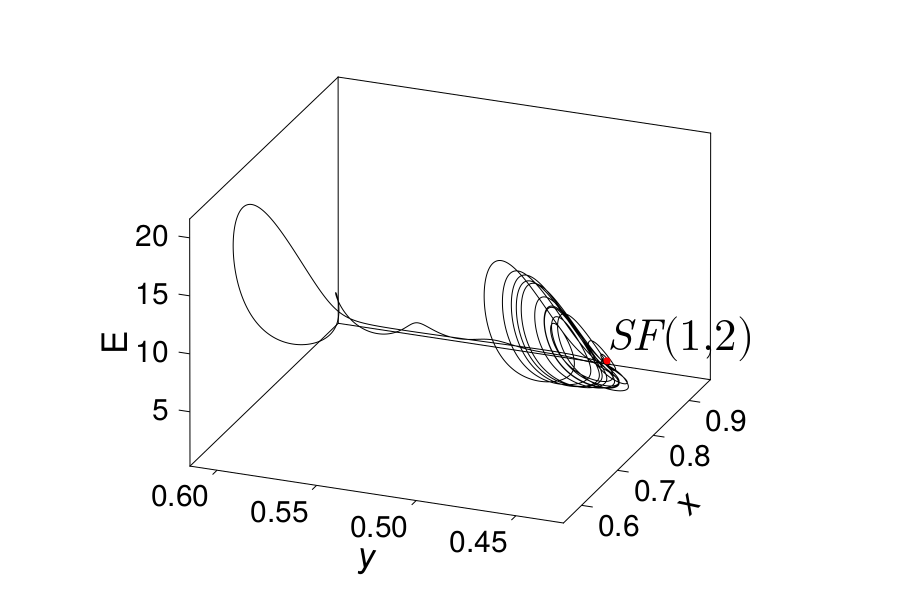

CairoMakie.Screen{IMAGE}


In [21]:
idx, idy, idz = 2, 3, 1
az = 1.12pi;
ts, tf = 960000, 994000
lb_size = 35; tck_size = 30;
prot = 60;
disx  = 50;
disy = 40;
disz = 55;

# azimuth = -0.32pi, elevation = 0.1pi
CairoMakie.activate!()

f = Figure(resolution = (900, 600))
ax = Axis3(f[1, 1], azimuth = az,
            xlabel = "x", ylabel = "y", zlabel = "E",
            xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, zgridvisible = false,
            protrusions = prot, xlabeloffset = disx, ylabeloffset = disy, zlabeloffset = disz)

#ax = LScene(f[1, 1])
#scale!(ax.scene, 1, 50, 50)

lines!(sol_for[idx,ts:tf], sol_for[idy,ts:tf], sol_for[idz,ts:tf],
    linewidth = 1.0, color = :black)

for (i, ep) in enumerate(fp)
    scatter!(ep[idx], ep[idy], ep[idz], color = :red, markersize = 10)
    text!(ep[idx], ep[idy], ep[idz],text = L"SF(1,2)", fontsize = 45, color = :black, align = (:left, :bottom))
end

#hidespines!(ax)
#hidedecorations!(ax)

#zlims!(0.0, 10.0)
#xlims!(0.5, 0.8)
#ylims!(0.4, 0.5)

    display(f)

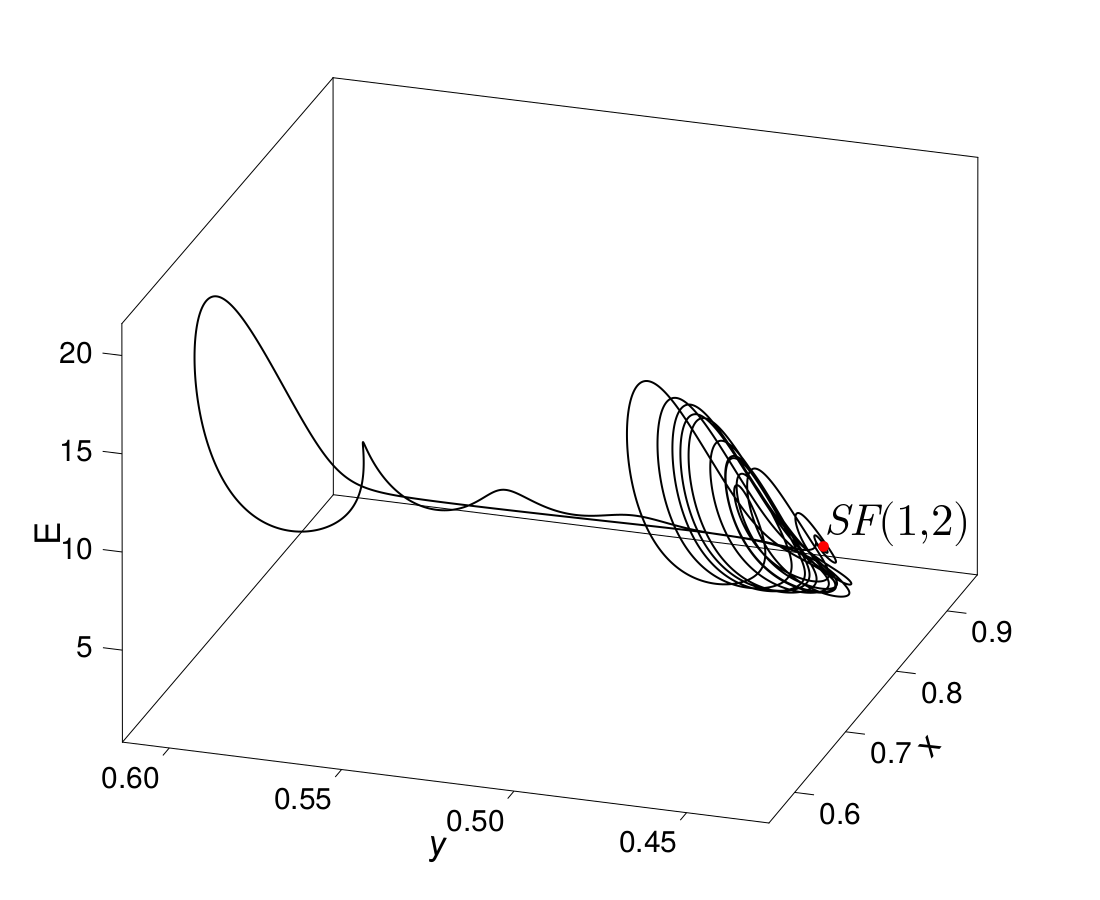

CairoMakie.Screen{IMAGE}


In [24]:
idx, idy, idz = 2, 3, 1
az = 1.1pi;
ts, tf = 960000, 970000
lb_size = 35; tck_size = 30;
prot = 60;
disx  = 50;
disy = 40;
disz = 55;

# azimuth = -0.32pi, elevation = 0.1pi
CairoMakie.activate!(type = "svg", antialias = :best)

f = Figure(resolution = (1100, 900))
ax = Axis3(f[1, 1], azimuth = az,
            xlabel = "x", ylabel = "y", zlabel = "E",
            xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, zgridvisible = false,
            protrusions = prot, xlabeloffset = disx, ylabeloffset = disy, zlabeloffset = disz)

#ax = LScene(f[1, 1])
#scale!(ax.scene, 1, 50, 50)

lines!(sol_for[idx,ts:tf], sol_for[idy,ts:tf], sol_for[idz,ts:tf],
    linewidth = 2.0, color = :black)

for (i, ep) in enumerate(fp)
    scatter!(ep[idx], ep[idy], ep[idz], color = :red, markersize = 15)
    text!(ep[idx], ep[idy], ep[idz],text = L"SF(1,2)", fontsize = 45, color = :black, align = (:left, :bottom))
end

#hidespines!(ax)
#hidedecorations!(ax)

#zlims!(0.0, 10.0)
#xlims!(0.5, 0.8)
#ylims!(0.4, 0.5)

display(f)

In [25]:
save("regular_near_homoclinic_phase.eps", f)

CairoMakie.Screen{EPS}


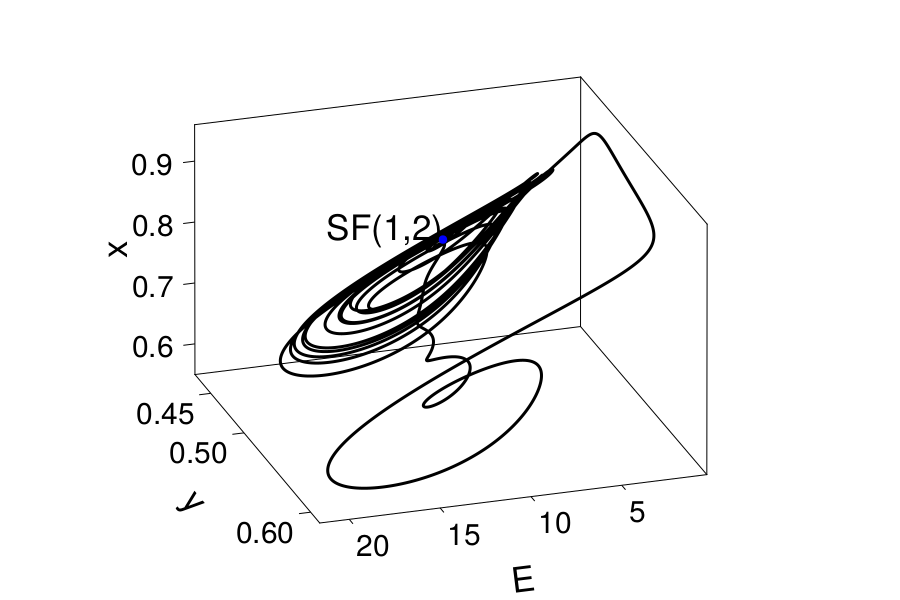

CairoMakie.Screen{IMAGE}


In [120]:
ts, tf = 200000, 500000
idx, idy, idz = 1, 3, 2
lb_size = 35; tck_size = 30;
dis  = 60;

CairoMakie.activate!()
f = Figure(resolution = (900, 600))
ax = Axis3(f[1, 1], azimuth = 0.4pi,
            xlabel = "E", ylabel = "y", zlabel = "x",
            xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, zgridvisible = false,
            protrusions = dis, xlabeloffset = dis, ylabeloffset = dis, zlabeloffset = dis,
            yticks = [0.45, 0.5, 0.6])

#ax = LScene(f[1, 1], show_axis = true)

#scale!(ax.scene, 1, 50, 50)

lines!(sol_for[idx,ts:tf], sol_for[idy,ts:tf], sol_for[idz,ts:tf],
    linewidth = 3.0, color = :black)

for (i, ep) in enumerate(fp)
    scatter!(ep[idx], ep[idy], ep[idz], color = :blue, markersize = 12)
    text!(ep[idx], ep[idy], ep[idz],text = "SF(1,2)", fontsize = 35, align = (:right, :baseline))
end

display(f)

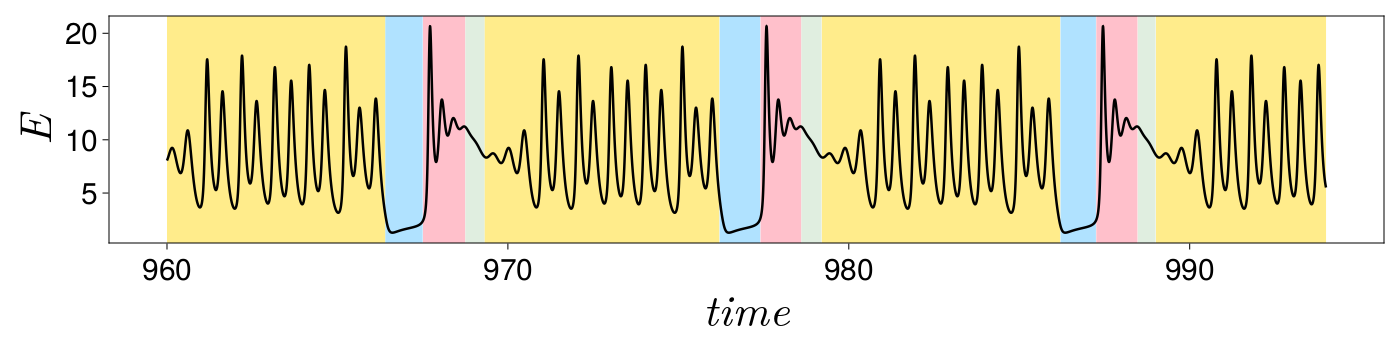

CairoMakie.Screen{IMAGE}


In [124]:
ts, tf = 960000, 994000 # 500000, 580000

lb_size = 45; tck_size = 30;
CairoMakie.activate!()
f = Figure(resolution = (1400, 350))
axis = Axis(f[1, 1], xlabel = L"$time$", ylabel = L"$E$",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false)

bluest = [966.401, 976.21, 986.21]
bluend = [967.5, 977.4, 987.25]
            
pinkst = [967.51, 977.41, 987.26]
pinkend = [968.752, 978.61, 988.47]
            
ph3st = [968.753, 978.61, 988.48]
ph3end = [969.32, 979.20, 989.0]

ph4st = [960.0, 969.32, 979.21, 989.01]
ph4end = [966.4, 976.2, 986.20, 994.0]
            
vspan!(pinkst, pinkend, color = :pink)
vspan!(bluest, bluend, color = :lightskyblue1)
vspan!(ph3st, ph3end, color = :honeydew2)
vspan!(ph4st, ph4end, color = :lightgoldenrod1)

lines!(axis, sol_for.t[ts:tf], sol_for[1, ts:tf], linewidth = 2.5, color = :black)
display(f)

In [125]:
save("regular_near_homoclinic_timeseries.eps", f)

CairoMakie.Screen{EPS}
